# <font color='red'> Nearest Neighbors

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
from IPython.display import Image
width=800; height=500
dir_path = r'D:\ASSIST\img'

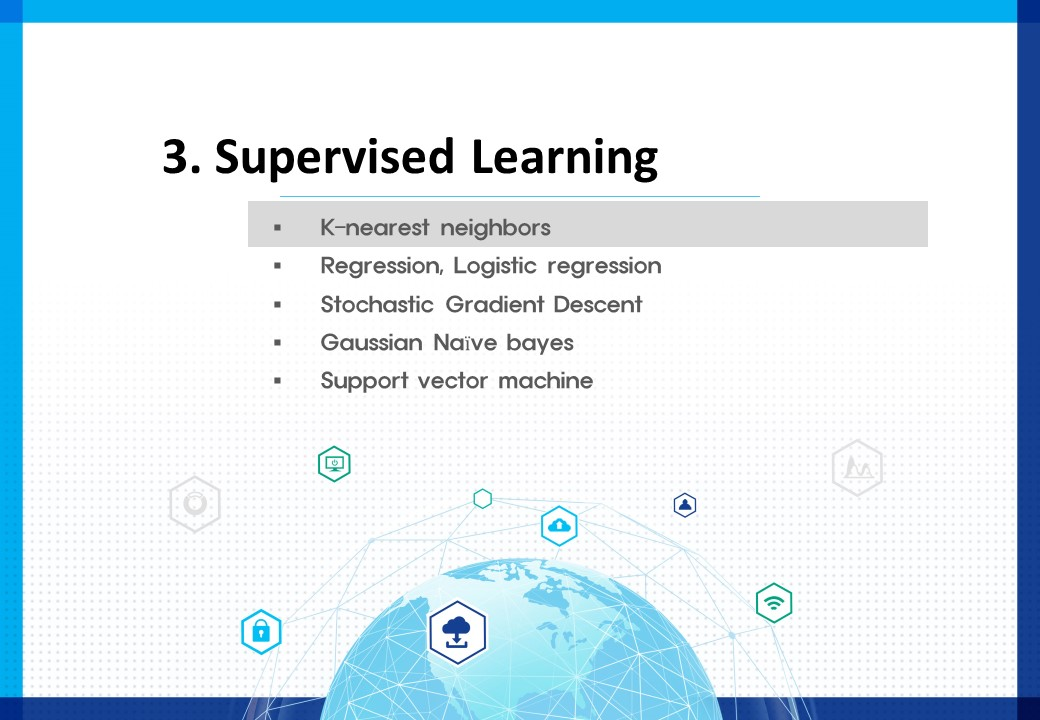

In [4]:
Image(filename=dir_path + '/슬라이드95.jpg', width=width, height=height)

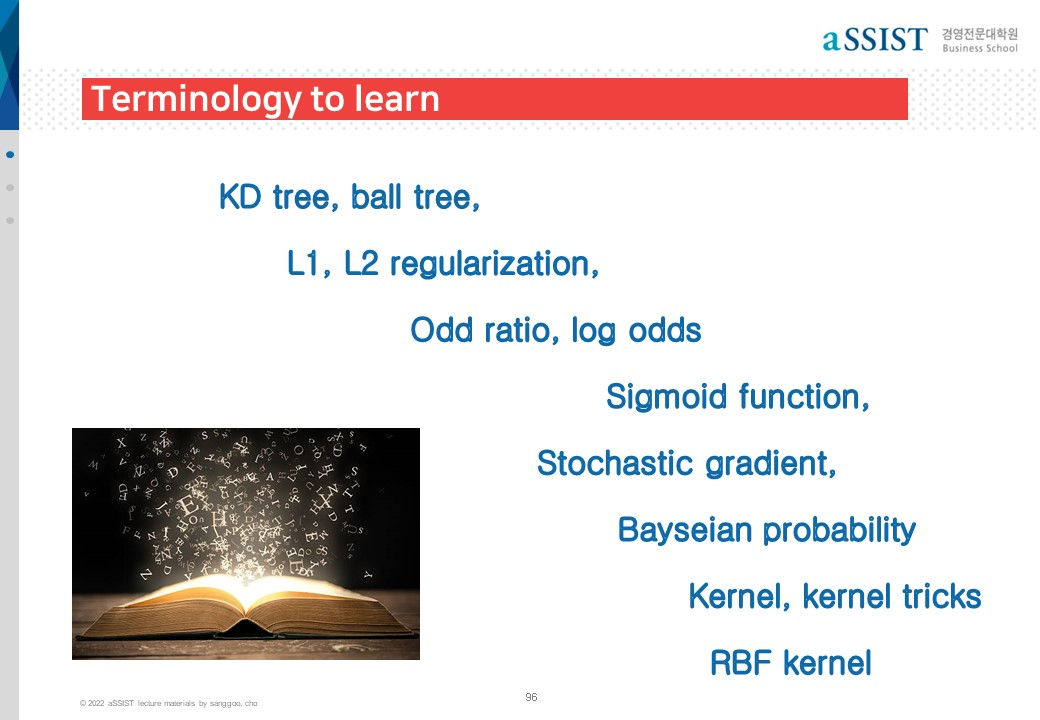

In [5]:
Image(filename=dir_path + '/슬라이드96.jpg', width=width, height=height)

In [100]:
from sklearn import neighbors
neighbors.KNeighborsClassifier().get_params()
neighbors.NearestNeighbors().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [102]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
KNeighborsClassifier().get_params()
NearestNeighbors().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

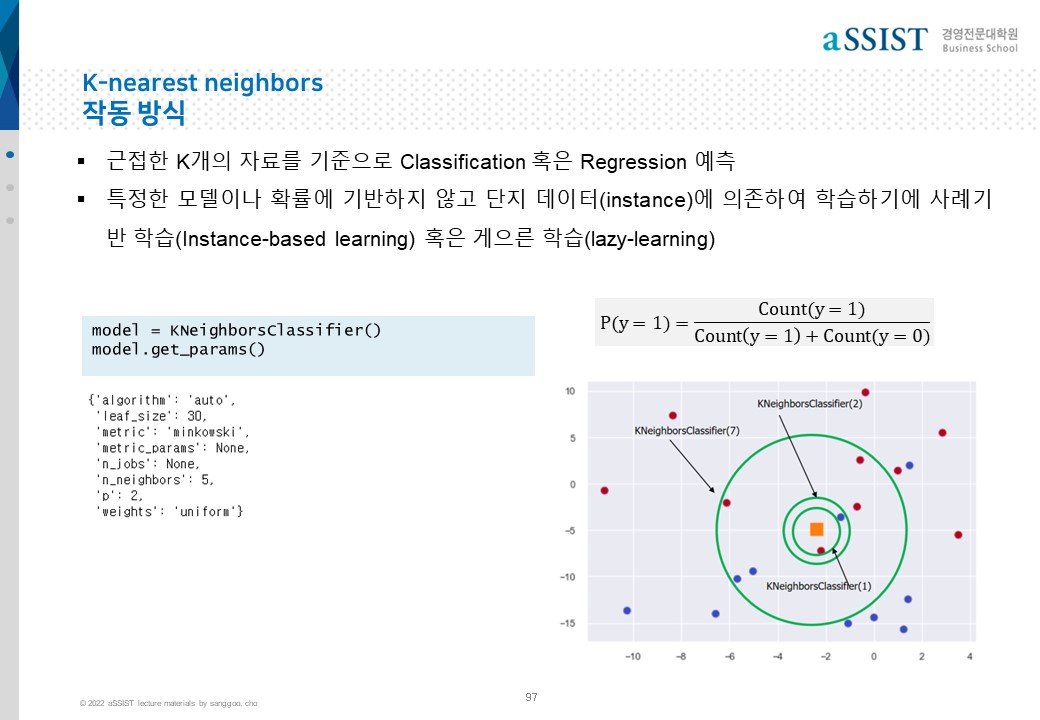

In [6]:
Image(filename=dir_path + '/슬라이드97.jpg', width=width, height=height)

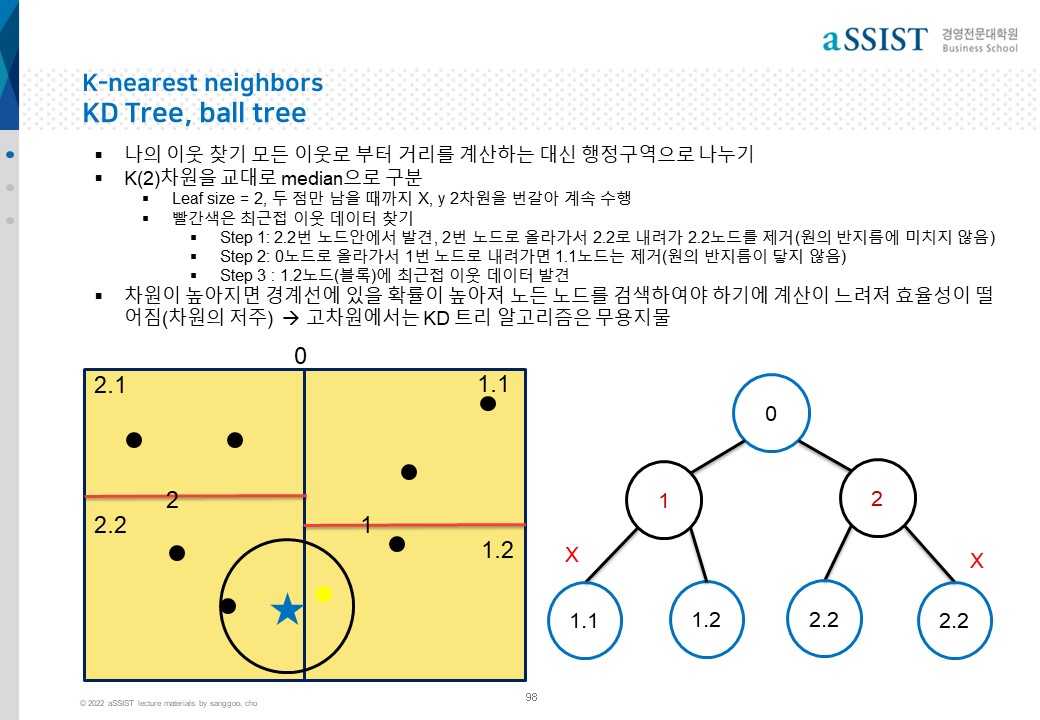

In [8]:
Image(filename=dir_path + '/슬라이드98.jpg', width=width, height=height)

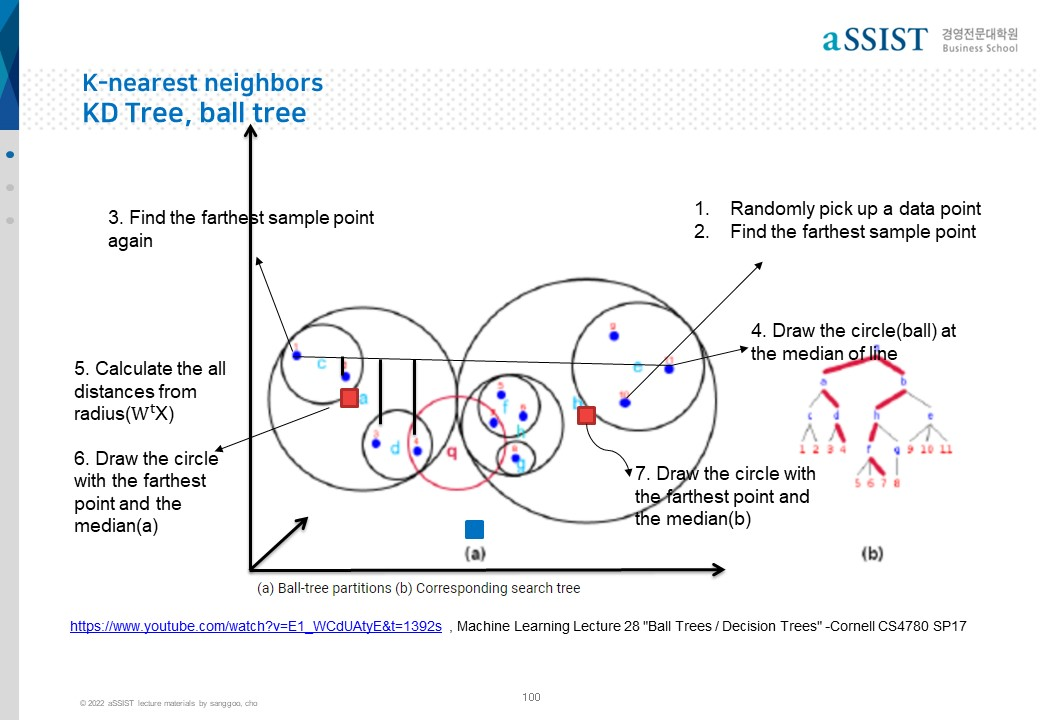

In [10]:
Image(filename=dir_path + '/슬라이드100.jpg', width=width, height=height)

#  KNN의 이해
### k-Nearest Neighbors and the Curse of Dimensionality

In [7]:
import matplotlib.patches as patches
from scipy import stats
sns.set_style("white")

# for 3d plots
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

from tqdm import tqdm

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve, train_test_split

plot_colors = np.array(sns.color_palette().as_hex())

### 300개의 2차원 표본과 한나의 시험용 인스턴스를 plot

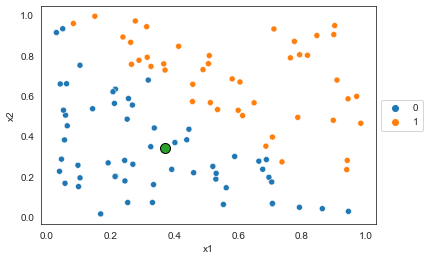

In [76]:
n_samples = 100
# Generate training data
X = np.random.uniform(0, 1, size=(n_samples,2))
y = np.array(X[:,0]+X[:,1] >= 1).astype(int)
# Generate a test point
x_test = np.random.uniform(0, 1, size=(1,2))
# Plot training data
sns.scatterplot(X[:,0], X[:,1], y);
# Plot test point
plt.scatter(x=x_test[:,0], y=x_test[:,1], facecolor=plot_colors[2], edgecolor='black', s=100);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.xlabel("x1");
plt.ylabel("x2");

### knn=1, 거리는 유클리디언 거리를 파라미터로 설정하고 이웃 인스턴를 원으로 표시

In [77]:
x_test

array([[0.37002528, 0.33946271]])

In [78]:
k = 1
# 거리는 L2 norm (유클리디언 거리)
distances = np.array([np.linalg.norm(x_test - x_train, ord=2) for x_train in X])
distances[:10]

# 가장 가까운 10개 인스턴스 index
np.argsort(distances)[:10]
nn = np.argsort(distances)[:k]
y_pred = y[nn]

array([0.27254715, 0.35116255, 0.32754111, 0.12750843, 0.17576144,
       0.80864277, 0.40376388, 0.04416451, 0.48970941, 0.22289154])

array([30,  7, 99, 12, 59, 91,  3, 63, 22,  4], dtype=int64)

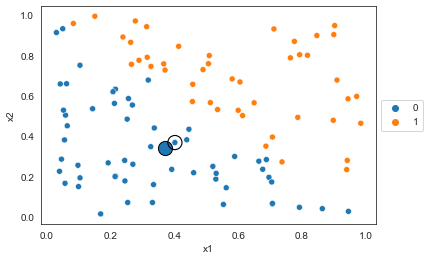

In [79]:
# Plot training data
sns.scatterplot(X[:,0], X[:,1], y);
# Plot test point
plt.scatter(x=x_test[:,0], y=x_test[:,1], facecolor=plot_colors[y_pred], edgecolor='black', s=200);
# Plot nearest neighbors
sns.scatterplot(x=X[nn,0], y=X[nn,1], facecolors='none', edgecolor='black', s=200);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.xlabel("x1");
plt.ylabel("x2");

k=1 인경우는 최근접이웃 분류기는 훈련 데이터를 기억하여 훈련 데이터에 대한 예측 오류가 0(100% 정확도), 즉 극단적 과적합(overfitting) 발생

In [84]:
k = 1
y_pred = np.zeros(n_samples)
y_pred
for idx, x_sample in enumerate(X):
  distances = np.array([np.linalg.norm(x_sample - x_train, ord=2) for x_train in X])
  nn = np.argsort(distances)[:k]
  y_pred[idx] = y[nn]
#accuracy for the training data
y_pred
np.mean(y_pred==y)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.])

1.0

### knn=3 인 이웃 인스턴를 원으로 표시

0


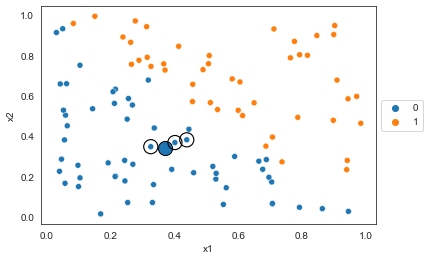

In [87]:
k = 3
distances = np.array([np.linalg.norm(x_test - x_train, ord=2) for x_train in X])
nn = np.argsort(distances)[:k]
y_pred = stats.mode(y[nn]).mode[0]
# Plot training data
sns.scatterplot(X[:,0], X[:,1], y);
# Plot test point
plt.scatter(x=x_test[:,0], y=x_test[:,1], facecolor=plot_colors[y_pred], edgecolor='black', s=200);
# Plot nearest neighbors
sns.scatterplot(x=X[nn,0], y=X[nn,1], facecolors='none', edgecolor='black', s=200);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1);
plt.xlabel("x1");
plt.ylabel("x2");

### K가 클수록 과적합을 방지하게 되고 훈련데이터의 정확도는 떨어지지만 새론운 데이터에 대한 예측력은 높아지게 된다. 
- k의 개수는 hyperparameter 대상

In [90]:
k = 3
y_pred = np.zeros(n_samples)
for idx, x_sample in enumerate(X):
  distances = np.array([np.linalg.norm(x_sample - x_train, ord=2) for x_train in X])
  nn = np.argsort(distances)[:k]
  y_pred[idx] = stats.mode(y[nn]).mode[0]
#accuracy for the training data
np.mean(y_pred==y)

0.97

# 이미지 인식 성능은 not good

In [92]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 21s 0us/step


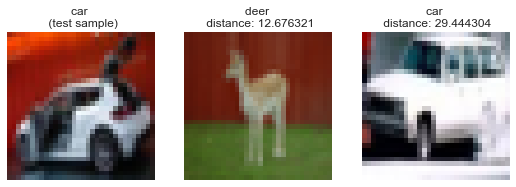

In [93]:
plt.figure(figsize=(9, 3))

plt.subplot(1, 3,1)

plt.imshow(X_test[6].astype('uint8'));
plt.title("%s \n (test sample)" % classes[y_test[6][0]]);
plt.axis('off');

plt.subplot(1,3,2)

plt.imshow(X_train[38805].astype('uint8'));
dist = np.linalg.norm(X_train[38805].ravel()*1.0/255-X_test[6].ravel()*1.0/255, ord=2)
plt.title("%s \n distance: %f" % (classes[y_train[38805][0]], dist));
plt.axis('off');

plt.subplot(1,3,3)

plt.imshow(X_train[32488].astype('uint8'));
dist = np.linalg.norm(X_train[32488].ravel()*1.0/255-X_test[6].ravel()*1.0/255, ord=2)
plt.title("%s \n distance: %f" % (classes[y_train[32488][0]], dist));
plt.axis('off');

## KNN과 차원의 저주(curse of dimensionality)
- 차원이 높아질수록 인스턴스간 거리는 점점 멀어지게 되어 거리로 구분하기 어려움
- 이미지데이터를 잘 구분 못하는 이유는 이미지는 차원이 높기 때문

In [94]:
n_samples = 30
k = 3
X = np.random.uniform(0, 1, size=(n_samples,3))
y = np.array(X.sum(axis=1) >= 1.5).astype(int)

x_test = 0.5*np.ones(3)

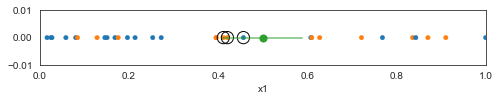

In [95]:
# Get nearest neighbors
distances = np.array([np.linalg.norm([x_test[0]] - x_train, ord=2) for x_train in X[:, 0]])
nn = np.argsort(distances)[:k]
mdist = np.max(distances[nn])

# Figure formatting stuff
plt.figure(figsize=(8,1))
plt.xlim(0,1);
plt.ylim(-0.01, 0.01);
plt.xlabel("x1")
# Plot training data
sns.scatterplot(x=X[:,0], y=0, hue=y, s=20, edgecolor=None, legend=False);
# Plot region that encloses nearest neighbors
plt.plot([x_test-mdist, x_test+mdist], [0,0], color=plot_colors[2], lw=2, alpha=0.2);
# Plot nearest neighbors
sns.scatterplot(x=X[nn,0], y=0, facecolors='none', edgecolor='black', s=150);
# Plot test point
plt.scatter(x=x_test[0], y=0, facecolor=plot_colors[2], s=50);

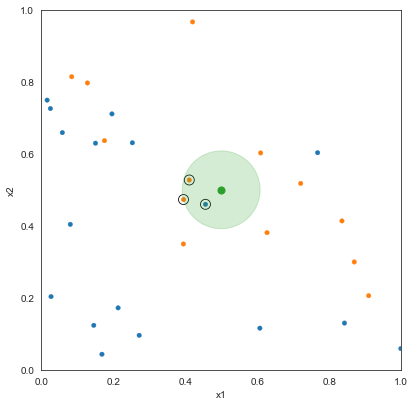

In [96]:
# Get nearest neighbors
distances = np.array([np.linalg.norm(x_test[0:2] - x_train, ord=2) for x_train in X[:, 0:2]])
nn = np.argsort(distances)[:k]
mdist = np.max(distances[nn])

# Figure formatting stuff
fig = plt.figure(figsize=(5,5))
ax = fig.add_axes([0,0,1,1])
plt.xlim(0,1);
plt.ylim(0,1);
plt.xlabel("x1")
plt.ylabel("x2")

# Plot training data
sns.scatterplot(x=X[:,0], y=X[:,1], hue=plot_colors[y], s=20, edgecolor=None, legend=False, ax=ax);
# Plot region that encloses nearest neighbors
circle = plt.Circle(x_test,mdist,
                          fill=True, color=plot_colors[2], alpha=0.2, zorder=1)
ax.add_patch(circle)
# Plot nearest neighbors
sns.scatterplot(x=X[nn,0], y=X[nn,1], facecolors='none', s=100, edgecolor='black', legend=False, ax=ax);
# Plot test point
plt.scatter(x=x_test[0], y=x_test[1], facecolor=plot_colors[2], s=50);

In [98]:
def plot_3D(elev=20, azim=-20, X=X, y=y, x_test=x_test):
    # Figure formatting stuff
    plt.figure(figsize=(10,10))
    ax = plt.subplot(projection='3d')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('x3')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    ax.set_zlim(0, 1)

    # Get nearest neighbors
    distances = np.array([np.linalg.norm(x_test - x_train, ord=2) for x_train in X])
    nn = np.argsort(distances)[:k]
    mdist = np.max(distances[nn])

    # Plot training data
    ax.scatter3D(X[:,0], X[:,1], X[:,2], s=50, c=plot_colors[y])

    # Plot region that encloses nearest neighbors
    u, v = np.mgrid[0:2*np.pi:16*1j, 0:np.pi:8*1j]
    sphere_x = x_test[0] + mdist * np.cos(u) * np.sin(v)
    sphere_y = x_test[1] + mdist * np.sin(u) * np.sin(v)
    sphere_z = x_test[2] + mdist * np.cos(v)
    ax.plot_wireframe(sphere_x, sphere_y, sphere_z, alpha=0.2, color=plot_colors[2])

    # Plot nearest neighbors
    ax.scatter3D(X[nn,0], X[nn,1], X[nn,2], s=150, c=plot_colors[y[nn]], edgecolor='black')

    # Plot test point
    ax.scatter3D(x_test[0], x_test[1], x_test[2], s=200, color=plot_colors[2])

interact(plot_3D, elev=np.arange(-90,90,10), azim=np.arange(-90,90,10),
         X=fixed(X), y=fixed(y), x_test=fixed(x_test));

interactive(children=(Dropdown(description='elev', index=11, options=(-90, -80, -70, -60, -50, -40, -30, -20, …

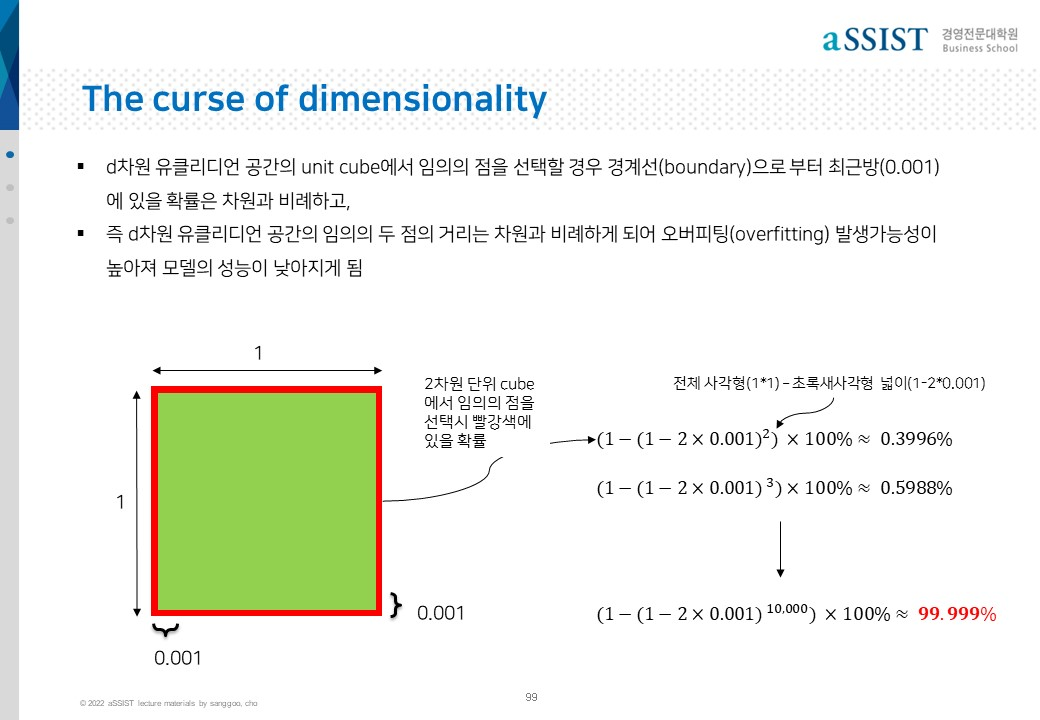

In [9]:
Image(filename=dir_path + '/슬라이드99.jpg', width=width, height=height)

##  1. K-Nearest Neighbors Classification
###  Step by Step Diabetes Classification-KNN-detailed
https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [3]:
from sklearn import datasets, neighbors, metrics
data = datasets.load_wine()
df = pd.DataFrame(data.data, columns= data.feature_names)
df['Outcome'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Outcome
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [4]:
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
from sklearn import model_selection, preprocessing, pipeline

X = df.drop(["Outcome"],axis = 1)
y = df.Outcome
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, random_state=11)
kf = model_selection.KFold(n_splits=3, shuffle=True, random_state=11)
np.random.seed(111)
pipe = pipeline.make_pipeline(
    #preprocessing.StandardScaler(),
    neighbors.KNeighborsClassifier()
)
param_dist= {'kneighborsclassifier__n_neighbors' : list(range(5,50, 2)),
             'kneighborsclassifier__weights'  : ['uniform','distance'],
             'kneighborsclassifier__algorithm' : ['ball_tree', 'kd_tree'],
             'kneighborsclassifier__leaf_size'  : list(range(5,50, 3))}

In [6]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'kneighborsclassifier', 'kneighborsclassifier__algorithm', 'kneighborsclassifier__leaf_size', 'kneighborsclassifier__metric', 'kneighborsclassifier__metric_params', 'kneighborsclassifier__n_jobs', 'kneighborsclassifier__n_neighbors', 'kneighborsclassifier__p', 'kneighborsclassifier__weights'])

In [7]:
randomized = model_selection.RandomizedSearchCV(estimator= pipe, 
                                                param_distributions= param_dist, 
                                                cv=kf,
                                                n_iter=50, random_state=1357,
                                                scoring= 'recall_macro', verbose=True)
randomized.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.0s finished


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=11, shuffle=True),
                   estimator=Pipeline(steps=[('kneighborsclassifier',
                                              KNeighborsClassifier())]),
                   n_iter=50,
                   param_distributions={'kneighborsclassifier__algorithm': ['ball_tree',
                                                                            'kd_tree'],
                                        'kneighborsclassifier__leaf_size': [5,
                                                                            8,
                                                                            11,
                                                                            14,
                                                                            17,
                                                                            20,
                                                                            23,
                    

In [8]:
print(f'optimal train score: {randomized.best_score_:.3f}') 
print(f'test score         : {randomized.score(X_test, y_test):.3f}')
print(f'optimal parameter  : {randomized.best_params_}')

optimal train score: 0.704
test score         : 0.725
optimal parameter  : {'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 7, 'kneighborsclassifier__leaf_size': 23, 'kneighborsclassifier__algorithm': 'ball_tree'}


              precision    recall  f1-score   support

           0       0.91      0.83      0.87        12
           1       0.75      0.64      0.69        14
           2       0.54      0.70      0.61        10

    accuracy                           0.72        36
   macro avg       0.73      0.73      0.72        36
weighted avg       0.74      0.72      0.73        36



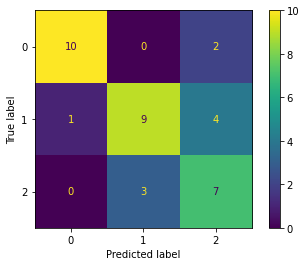

In [9]:
metrics.plot_confusion_matrix(randomized, X_test, y_test)
y_pred = randomized.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

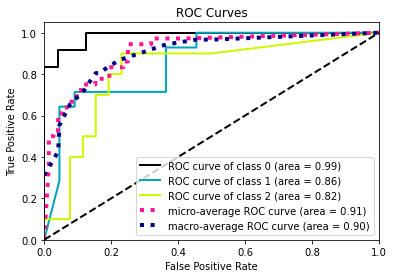

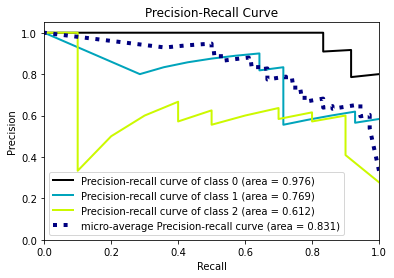

In [10]:
import scikitplot as skplt 
y_probas = randomized.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)
skplt.metrics.plot_precision_recall(y_test, y_probas)

## 2.  KNN regressor

<Figure size 1800x504 with 0 Axes>

<AxesSubplot:>

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, 'KNeighborsRegressor k = 3')

<AxesSubplot:>

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, 'KNeighborsRegressor k = 10')

<AxesSubplot:>

(-0.25, 5.25, -1.098448861720446, 1.0678698394422892)

Text(0.5, 1.0, 'KNeighborsRegressor k = 20')

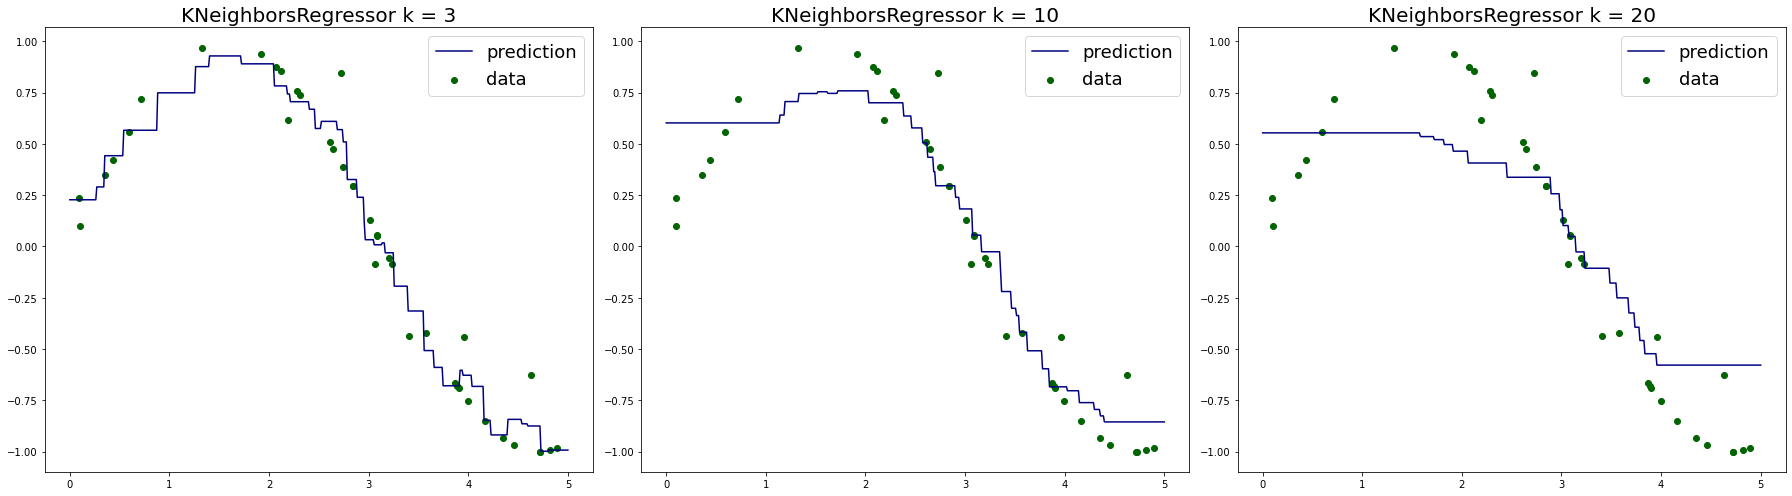

In [11]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8)) # noise 생성

plt.figure(figsize=(25, 7)) 
for i, neighbor in enumerate([3, 10, 20]):
    knn = neighbors.KNeighborsRegressor(n_neighbors=neighbor)
    y_ = knn.fit(X, y).predict(T)
    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='darkgreen', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend(fontsize='18')
    plt.title(f'KNeighborsRegressor k = {neighbor}',
             fontsize='20')
plt.tight_layout()
plt.show()


## 2. Unsupervised K-Nearest Neighbors
https://scikit-learn.org/stable/modules/neighbors.html

array([[-1, -1],
       [-2, -1],
       [-3, -2],
       [ 1,  1],
       [ 2,  1],
       [ 3,  2]])

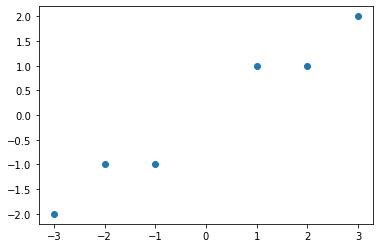

In [44]:
from sklearn.neighbors import NearestNeighbors
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X
plt.scatter(X[:, 0], X[:, 1])

In [12]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
indices

distances

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

### a sparse graph showing the connections between neighboring points:

In [14]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

# End